In [1]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_1"

# Load the file
if os.path.isfile(binecode_path):
    g = Graph.load_from_file(binecode_path)
    print(g)
else:
    print(f"File does not exist: {binecode_path}")

Graph(number_of_edges=118902, number_of_vertices=29988, number_of_temporal_edges=217542608, earliest_time="1", latest_time="3779999")


In [5]:
from raphtory import algorithms as rp

results = rp.pagerank(g)

top_15 = results.top_k(15)
for rank, (name,score) in enumerate(top_15, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

Rank 1: MS_27421 with a score of 0.03301
Rank 2: MS_37691 with a score of 0.01591
Rank 3: MS_2827 with a score of 0.00608
Rank 4: MS_46825 with a score of 0.00534
Rank 5: MS_21883 with a score of 0.00313
Rank 6: MS_21537 with a score of 0.00280
Rank 7: MS_44585 with a score of 0.00217
Rank 8: MS_14728 with a score of 0.00201
Rank 9: MS_35973 with a score of 0.00190
Rank 10: MS_46708 with a score of 0.00190
Rank 11: MS_19585 with a score of 0.00187
Rank 12: MS_8234 with a score of 0.00163
Rank 13: MS_5867 with a score of 0.00158
Rank 14: MS_27239 with a score of 0.00154
Rank 15: MS_6045 with a score of 0.00153


In [ ]:
import pandas as pd
import matplotlib
from raphtory import algorithms as rp

importance = []
time = []

results = rp.pagerank(g)

top_10 = results.top_k(10)
for rank, (name,score) in enumerate(top_10, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

    for windowed_graph in g.rolling(window=60000):
        result = rp.pagerank(windowed_graph)
        importance.append(result.get(str(name)))
        time.append(windowed_graph.earliest_time)

plt.plot(time, importance, marker="o")
plt.xlabel("Sentence (Time)")
plt.ylabel("Pagerank Score")
plt.title("top 10 critical services' importance over time")
plt.grid(True)

Rank 1: MS_27421 with a score of 0.03301
Rank 2: MS_37691 with a score of 0.01591
Rank 3: MS_2827 with a score of 0.00608
Rank 4: MS_46825 with a score of 0.00534
Rank 5: MS_21883 with a score of 0.00313
Rank 6: MS_21537 with a score of 0.00280
Rank 7: MS_44585 with a score of 0.00217
Rank 8: MS_14728 with a score of 0.00201
Rank 9: MS_35973 with a score of 0.00190
Rank 10: MS_46708 with a score of 0.00190


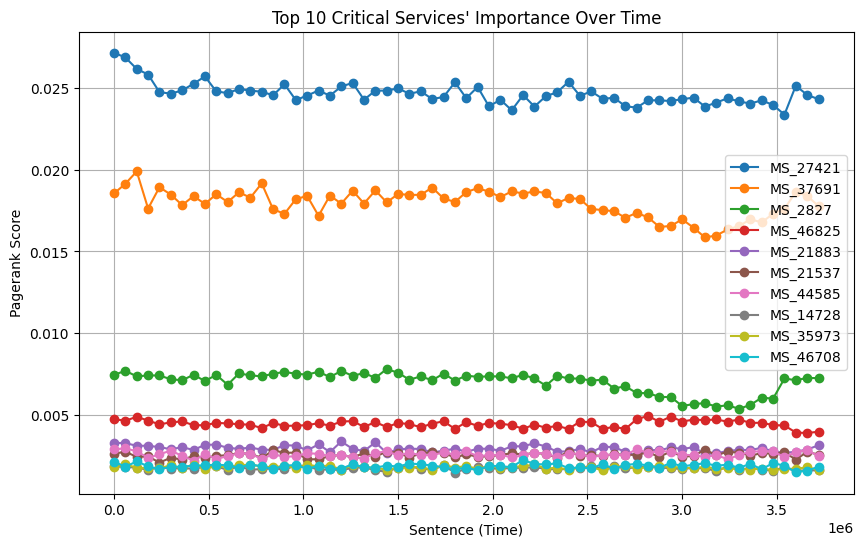

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from raphtory import algorithms as rp

# Get top 10 most important ms
results = rp.pagerank(g)
top_10 = results.top_k(10)

# Initialise a dictionary to store time and importance scores for each ms based on the data provided in pagerank()
service_data = {name: {'time': [], 'importance': []} for rank, (name, score) in enumerate(top_10, 1)}

# Iterate through the top 10 ms and collect their importance scores over time
for rank, (name, score) in enumerate(top_10, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

    # Store for each ms the scores along with the corresponding time points.
    for windowed_graph in g.rolling(window=60000):
        result = rp.pagerank(windowed_graph)
        service_data[name]['time'].append(windowed_graph.earliest_time)
        service_data[name]['importance'].append(result.get(str(name)))

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each ms' importance over time
for name, data in service_data.items():
    plt.plot(data['time'], data['importance'], marker="o", label=name)

plt.xlabel("Sentence (Time)")
plt.ylabel("Pagerank Score")
plt.title("Top 10 Critical Microservices' Importance Over Time")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
from raphtory import algorithms as rp

results = rp.max_in_degree(g)

top_20 = results.top_k(20)
for rank, (name,score) in enumerate(top_20, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

AttributeError: 'int' object has no attribute 'top_k'

In [35]:
from raphtory import PyDirection

# usage in the function call
balance_result = rp.degree_centrality(g, threads=2)

top_20 = balance_result.top_k(20)
for rank, (name,score) in enumerate(top_20, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

Rank 1: MS_27421 with a score of 1.00000
Rank 2: USER with a score of 0.59716
Rank 3: MS_37691 with a score of 0.39158
Rank 4: MS_2827 with a score of 0.31773
Rank 5: MS_46825 with a score of 0.27006
Rank 6: MS_21883 with a score of 0.12220
Rank 7: MS_45285 with a score of 0.10938
Rank 8: MS_14728 with a score of 0.10834
Rank 9: MS_35973 with a score of 0.09430
Rank 10: MS_39211 with a score of 0.09412
Rank 11: MS_27239 with a score of 0.09274
Rank 12: MS_14304 with a score of 0.08719
Rank 13: MS_46708 with a score of 0.08684
Rank 14: MS_5867 with a score of 0.08546
Rank 15: MS_4354 with a score of 0.08060
Rank 16: MS_25557 with a score of 0.07679
Rank 17: MS_68453 with a score of 0.07402
Rank 18: MS_55085 with a score of 0.07384
Rank 19: MS_8234 with a score of 0.07055
Rank 20: MS_21537 with a score of 0.07055


In [9]:
print(rp.max_in_degree(g))

5769
